In [1]:

# CAPSTONE PROJECT: HOUSE PRICE ANALYSIS

# Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

file_path = r"E:\project.xls"   # Change path if needed
df = pd.read_excel(file_path)

print(df.head())
print(df.describe())

   obs   sell   lot  bdms  fb  sty  drv  rec  ffin  ghw  ca  gar  reg
0    1  42000  5850     3   1    2    1    0     1    0   0    1    0
1    2  38500  4000     2   1    1    1    0     0    0   0    0    0
2    3  49500  3060     3   1    1    1    0     0    0   0    0    0
3    4  60500  6650     3   1    2    1    1     0    0   0    0    0
4    5  61000  6360     2   1    1    1    0     0    0   0    0    0
              obs           sell           lot        bdms          fb  \
count  546.000000     546.000000    546.000000  546.000000  546.000000   
mean   273.500000   68121.597070   5150.265568    2.965201    1.285714   
std    157.760895   26702.670926   2168.158725    0.737388    0.502158   
min      1.000000   25000.000000   1650.000000    1.000000    1.000000   
25%    137.250000   49125.000000   3600.000000    2.000000    1.000000   
50%    273.500000   62000.000000   4600.000000    3.000000    1.000000   
75%    409.750000   82000.000000   6360.000000    3.000000    

In [3]:

# (a) Linear model with sell as dependent variable

y = df['sell']
X = df.drop(columns=['sell', 'obs'])

X = sm.add_constant(X)

model_a = sm.OLS(y, X).fit()
print(model_a.summary())

# Ramsey RESET Test
reset_test_a = linear_reset(model_a, power=2, use_f=True)

print("RESET Test (Level Model)")
print("F-statistic:", reset_test_a.fvalue)
print("p-value:", reset_test_a.pvalue)

if reset_test_a.pvalue < 0.05:
    print("Reject H0 → Model is NOT linear at 5% level.")
else:
    print("Fail to reject H0 → Model is linear at 5% level.")

                            OLS Regression Results                            
Dep. Variable:                   sell   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Sat, 21 Feb 2026   Prob (F-statistic):          6.18e-122
Time:                        22:32:01   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4038.3504   3409.471     -1.184      0.2

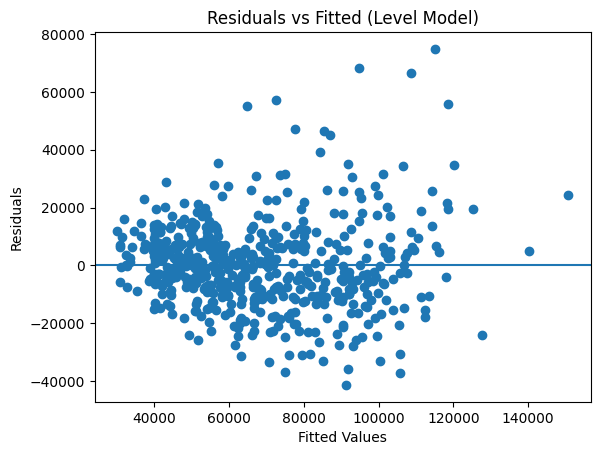

In [4]:
plt.figure()
plt.scatter(model_a.fittedvalues, model_a.resid)
plt.axhline(0)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Level Model)")
plt.show()

In [5]:

# (b) Log-linear model

df['log_sell'] = np.log(df['sell'])

y_log = df['log_sell']
X_log = df.drop(columns=['sell', 'log_sell', 'obs'])
X_log = sm.add_constant(X_log)

model_b = sm.OLS(y_log, X_log).fit()
print(model_b.summary())

# RESET test
reset_test_b = linear_reset(model_b, power=2, use_f=True)

print("RESET Test (Log Model)")
print("F-statistic:", reset_test_b.fvalue)
print("p-value:", reset_test_b.pvalue)

if reset_test_b.pvalue < 0.05:
    print("Reject H0 → Model is NOT linear.")
else:
    print("Fail to reject H0 → Model is linear.")

                            OLS Regression Results                            
Dep. Variable:               log_sell   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 21 Feb 2026   Prob (F-statistic):          3.67e-123
Time:                        22:32:40   Log-Likelihood:                 73.873
No. Observations:                 546   AIC:                            -123.7
Df Residuals:                     534   BIC:                            -72.11
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0256      0.047    212.210      0.0

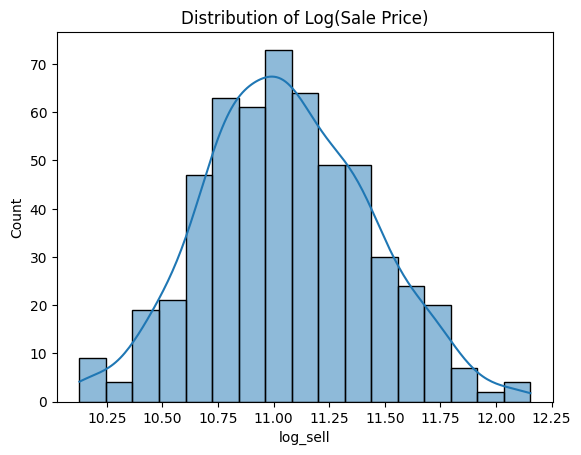

In [6]:
plt.figure()
sns.histplot(df['log_sell'], kde=True)
plt.title("Distribution of Log(Sale Price)")
plt.show()

In [7]:

# (c) Include lot and log(lot)

df['log_lot'] = np.log(df['lot'])

X_c = df[['lot', 'log_lot', 'bdms', 'fb', 'sty', 'drv',
          'rec', 'ffin', 'ghw', 'ca', 'gar', 'reg']]

X_c = sm.add_constant(X_c)

model_c = sm.OLS(df['log_sell'], X_c).fit()
print(model_c.summary())

print("Check significance of lot and log_lot to decide which to include.")

                            OLS Regression Results                            
Dep. Variable:               log_sell   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     97.51
Date:                Sat, 21 Feb 2026   Prob (F-statistic):          6.43e-126
Time:                        22:33:24   Log-Likelihood:                 82.843
No. Observations:                 546   AIC:                            -139.7
Df Residuals:                     533   BIC:                            -83.75
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1505      0.683     10.469      0.0

In [8]:

# (d) Interaction Effects

X_d = df[['log_lot', 'bdms', 'fb', 'sty', 'drv',
          'rec', 'ffin', 'ghw', 'ca', 'gar', 'reg']].copy()

# Create interaction terms
for col in X_d.columns:
    if col != 'log_lot':
        X_d[f'loglot_{col}'] = df['log_lot'] * df[col]

X_d = sm.add_constant(X_d)

model_d = sm.OLS(df['log_sell'], X_d).fit()
print(model_d.summary())

# Count individually significant interactions
interaction_cols = [col for col in X_d.columns if 'loglot_' in col]
significant = [col for col in interaction_cols if model_d.pvalues[col] < 0.05]

print("Number of individually significant interactions:", len(significant))
print("Significant interactions:", significant)

                            OLS Regression Results                            
Dep. Variable:               log_sell   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     56.89
Date:                Sat, 21 Feb 2026   Prob (F-statistic):          2.26e-120
Time:                        22:33:48   Log-Likelihood:                 89.971
No. Observations:                 546   AIC:                            -135.9
Df Residuals:                     524   BIC:                            -41.28
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.9665      1.071      8.375      

In [9]:

# (e) Joint F-test for interaction effects


hypothesis = ' + '.join(interaction_cols) + ' = 0'
f_test = model_d.f_test(hypothesis)

print("Joint F-test results:")
print(f_test)

Joint F-test results:
<F test: F=0.6391342165534517, p=0.42438672574213115, df_denom=524, df_num=1>


In [10]:

# (f) General-to-Specific approach


current_model = model_d
current_X = X_d.copy()

while True:
    pvals = current_model.pvalues
    interaction_pvals = pvals[interaction_cols]
    max_p = interaction_pvals.max()

    if max_p > 0.05:
        remove_var = interaction_pvals.idxmax()
        print("Removing:", remove_var)

        current_X = current_X.drop(columns=[remove_var])
        interaction_cols.remove(remove_var)

        current_model = sm.OLS(df['log_sell'], current_X).fit()
    else:
        break

print("Final Selected Model:")
print(current_model.summary())

Removing: loglot_reg
Removing: loglot_bdms
Removing: loglot_ffin
Removing: loglot_ghw
Removing: loglot_ca
Removing: loglot_gar
Removing: loglot_fb
Removing: loglot_sty
Removing: loglot_drv
Final Selected Model:
                            OLS Regression Results                            
Dep. Variable:               log_sell   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     98.59
Date:                Sat, 21 Feb 2026   Prob (F-statistic):          8.71e-127
Time:                        22:34:45   Log-Likelihood:                 84.909
No. Observations:                 546   AIC:                            -143.8
Df Residuals:                     533   BIC:                            -87.88
Df Model:                          12                                         
Covariance Type:            nonrobust                                         

In [11]:

# (h) Predictive Power Analysis


X_final = df[['log_lot', 'bdms', 'fb', 'sty', 'drv',
              'rec', 'ffin', 'ghw', 'ca', 'gar', 'reg']]

X_final = sm.add_constant(X_final)
y_final = df['log_sell']

# Split data
X_train = X_final.iloc[:400]
y_train = y_final.iloc[:400]

X_test = X_final.iloc[400:]
y_test = y_final.iloc[400:]

# Fit model
model_h = sm.OLS(y_train, X_train).fit()

# Predictions
y_pred = model_h.predict(X_test)

# Calculate MAE
MAE = np.mean(np.abs(y_test - y_pred))
std_log_price = np.std(y_test)

print("MAE:", MAE)
print("Standard Deviation of log price:", std_log_price)
print("MAE / Std Dev:", MAE / std_log_price)

MAE: 0.12784156874513528
Standard Deviation of log price: 0.28778168114464014
MAE / Std Dev: 0.44423108599772765


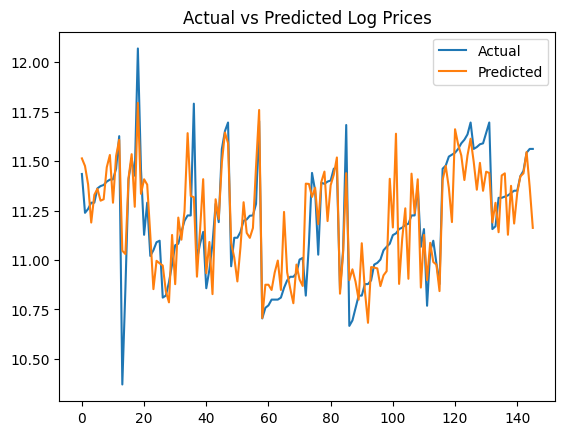

In [12]:
plt.figure()
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred.values, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Log Prices")
plt.show()